In [1]:

#from TestDiff.ipynb import Crystal
import numpy as np
import ctypes
import hyperspy.api as hs
import matplotlib.pyplot as plt


#Wrapper

#path to the dll
lib = ctypes.CDLL("E:/Arxius varis/PhD/2nd_year/Code/Diffraction_pattern_simulation_E_V/Library/difftool_3.0/diffTools.dll")


CrystalHandle = ctypes.POINTER(ctypes.c_char)
c_int_array = np.ctypeslib.ndpointer(dtype=np.int32, ndim=1, flags='C_CONTIGUOUS')
c_int_array_2 = np.ctypeslib.ndpointer(dtype=np.int32, ndim=2, flags='C_CONTIGUOUS')
c_float_array=np.ctypeslib.ndpointer(dtype=np.float32, ndim=1, flags='C_CONTIGUOUS')
c_double_array=np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')



lib.createCrystal.argtypes = [ctypes.c_char_p]
lib.createCrystal.restype = CrystalHandle

lib.calc_d.argtypes = [CrystalHandle, ctypes.c_bool, ctypes.c_float]
lib.calc_d.restypes = ctypes.c_int

lib.FindZA.argtypes = [CrystalHandle, ctypes.c_float, ctypes.c_float, ctypes.c_float, ctypes.c_float]
lib.FindZA.restype = ctypes.c_int

lib.GetZA.argtypes = [CrystalHandle, ctypes.c_int, c_int_array]
lib.GetZA.restype = None

#custom for getting the possible indexation of the pair of spots considered
lib.Gethkls1.argtypes = [CrystalHandle, ctypes.c_int, c_int_array]
lib.Gethkls1.restype = None

lib.Gethkls2.argtypes = [CrystalHandle, ctypes.c_int, c_int_array]
lib.Gethkls2.restype = None

lib.destroyCrystal.argtypes = [CrystalHandle]
lib.destroyCrystal.restype = None

lib.angle.argtypes = [CrystalHandle, c_int_array, c_int_array]
lib.angle.restype = ctypes.c_float

lib.getF.argtypes = [CrystalHandle, ctypes.c_int]
lib.getF.restype = ctypes.c_double

lib.getDistances.argtypes = [CrystalHandle, ctypes.c_int]
lib.getDistances.restype = ctypes.c_float

lib.getIndexes.argtypes = [CrystalHandle, ctypes.c_int, c_int_array]
lib.getIndexes.restype = None

lib.calcKineDP.argtypes= [CrystalHandle, ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.c_float]
lib.calcKineDP.restype= ctypes.c_int

lib.kineDP_angles.argtypes = [CrystalHandle, c_int_array, c_int_array]
lib.kineDP_angles.restype = ctypes.c_double


C:\Users\Marc\Anaconda3\lib\site-packages\pyUSID\viz\__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


In [2]:

class Crystal:
    
    
    def __init__(self,name):
        self.instance = lib.createCrystal(name)
        self.phase_name=name

    
    def __del__(self):
        lib.destroyCrystal(self.instance)
    
    def getZA(self,N):
        n = ctypes.c_int(N)
        hkl = np.empty(3, dtype=np.int32)
        lib.GetZA(self.instance,n,hkl)
        return hkl
    
    def gethkls1(self,N):
        n = ctypes.c_int(N)
        hkl = np.empty(3, dtype=np.int32)
        lib.Gethkls1(self.instance,n,hkl)
        return hkl
    
    def gethkls2(self,N):
        n = ctypes.c_int(N)
        hkl = np.empty(3, dtype=np.int32)
        lib.Gethkls2(self.instance,n,hkl)
        return hkl
    
    
    def Diff(self,flag,D):
        min_d = ctypes.c_float(D)
        flagd=ctypes.c_bool(flag)
        N = lib.calc_d(self.instance,flagd,min_d)
        return N
    
    def FindZA(self,D1,D2,ANG,TOL):
        d1=ctypes.c_float(D1)
        d2=ctypes.c_float(D2)
        ang=ctypes.c_float(ANG)
        tol=ctypes.c_float(TOL)
        self.n = lib.FindZA(self.instance,d1,d2,ang,tol)
        return self.n
    
    def angle(self, hkl, hkl2):
        
        angle = lib.angle(self.instance,hkl,hkl2)
        return angle
    
    def getIndexes(self,N):
        n = ctypes.c_int(N)
        hkl = np.empty(3, dtype=np.int32)
        lib.getIndexes(self.instance,n,hkl)
        return hkl
    
    def getF(self,N):
        n = ctypes.c_int(N)
        F = ctypes.c_double()
        F = lib.getF(self.instance,n)
        return F    
    
    def getDistances(self,N):
        n = ctypes.c_int(N)
        d = ctypes.c_float()
        d = lib.getDistances(self.instance,n)
        return d  
    
    def calcKineDP(self, U, V, W, D):
        u=ctypes.c_int(U)
        v=ctypes.c_int(V)
        w=ctypes.c_int(W)
        min_d=ctypes.c_float(D)
        size=lib.calcKineDP(self.instance, u,v,w,min_d)
        return size
    
    def kineDP_angles(self, hkl1, hkl2):
        angle=lib.kineDP_angles(self.instance, hkl1, hkl2)
        return angle
        
    

In [3]:
#test on kindeDP
 
Silicon = Crystal(b'E:/Arxius varis/PhD/2nd_year/Code/unit_cells/Si.uce')

min_d=0.5    #minimum interplanar distance computed in the diffraction

ZA=np.array([1,1,1], dtype=np.int32)

DPsize=Silicon.calcKineDP(ZA[0], ZA[1], ZA[2], min_d)

total_DP=[]
for ref in range(DPsize):
    hkls=Silicon.getIndexes(ref)
    total_DP.append(hkls)
    
print(DPsize)
print(total_DP)

hkl1=total_DP[0]

angles=[]
distances=[]
Fs=[]
for index_hkl2, hkl2 in enumerate(total_DP):
    angle=Silicon.kineDP_angles(hkl1, hkl2)
    distance=Silicon.getDistances(index_hkl2)
    F=Silicon.getF(index_hkl2)
    
    distances.append(distance)
    angles.append(angle)
    Fs.append(F)
    
angles=np.asarray(angles)
distances=np.asarray(distances)
Fs=np.asarray(Fs)

angles.shape=(np.shape(angles)[0],1)
distances.shape=(np.shape(distances)[0],1)
Fs.shape=(np.shape(Fs)[0],1)


distances_angles=np.hstack((distances, angles))
distances_angles_Fs=np.hstack((distances_angles, Fs))
print(distances_angles_Fs)


total_DP=np.asarray(total_DP)
#delete these reflections that are repeated twice or more
temp_array_reflects_s = np.ascontiguousarray(total_DP).view(np.dtype((np.void, total_DP.dtype.itemsize * total_DP.shape[1])))
_, idx,counts = np.unique(temp_array_reflects_s, return_index=True, return_counts=True)
total_DP_reduced=total_DP[idx]

distances_angles_Fs_reduced=[]
for red_reflection in total_DP_reduced:
    for index_tot, tot_reflection in enumerate(total_DP):
        if red_reflection[0]==tot_reflection[0] and red_reflection[1]==tot_reflection[1] and red_reflection[2]==tot_reflection[2]:
            distances_angles_Fs_reduced.append(distances_angles_Fs[index_tot])
            break
            
total_DP=list(total_DP_reduced)
distances_angles_Fs=distances_angles_Fs_reduced
distances_angles_Fs_r=[distances_angles_Fs_el for distances_angles_Fs_el in sorted(distances_angles_Fs, key=lambda x: x[0])][::-1]
total_DP=[reflection_el for reflection_el,_ in sorted(zip(total_DP,distances_angles_Fs), key=lambda x: x[1][0])][::-1]

distances_angles_Fs=np.asarray(distances_angles_Fs_r) 
print(len(total_DP))
print(total_DP)
print(len(distances_angles_Fs))
print(distances_angles_Fs)
#define resolution parameter, which can either be defined by simple min_d or by a desired and fixed microscope resolution
#or even make it change depending on the field of view or pixel size
#the resolution will limit these spots that appear or not. If res = 0.7 angstroms, we can only display these planes whose 
#whose interplanar distances are bigger than this (not having to compute the DP again with different min_d)
res=True
res_value=0.7  #angstroms, like probe corrected TITAN in STEM HAADF (in ZGZ), for instance
if res==True:
    index_res=len(distances_angles_Fs[:,0][distances_angles_Fs[:,0]>res_value])
    distances_angles_Fs=distances_angles_Fs[:index_res-1,:]


60
[array([ 0,  2, -2]), array([ 0, -2,  2]), array([ 0, -2,  2]), array([ 0,  2, -2]), array([ 2, -2,  0]), array([ 2,  0, -2]), array([-2,  0,  2]), array([-2,  2,  0]), array([ 4, -2, -2]), array([ 2,  2, -4]), array([-2, -2,  4]), array([ 2, -4,  2]), array([-2,  4, -2]), array([-4,  2,  2]), array([ 0,  4, -4]), array([ 0, -4,  4]), array([ 0, -4,  4]), array([ 4,  0, -4]), array([-4,  0,  4]), array([-4,  4,  0]), array([ 0,  4, -4]), array([ 4, -4,  0]), array([-4,  6, -2]), array([ 6, -2, -4]), array([-6,  2,  4]), array([ 6, -4, -2]), array([ 2,  4, -6]), array([-2, -4,  6]), array([ 2, -6,  4]), array([-6,  4,  2]), array([-2,  6, -4]), array([ 4,  2, -6]), array([-4, -2,  6]), array([ 4, -6,  2]), array([ 0,  6, -6]), array([ 0, -6,  6]), array([ 0, -6,  6]), array([ 0,  6, -6]), array([ 6,  0, -6]), array([-6,  0,  6]), array([ 6, -6,  0]), array([-6,  6,  0]), array([ 4, -8,  4]), array([-4,  8, -4]), array([ 4,  4, -8]), array([-4, -4,  8]), array([ 8, -4, -4]), array([-8

In [4]:
total_pixels=1024

#define either the total field of view or the pixel size
fov=10   #nm
pixel_size=  0.03   #nm



def Calib_By_FOV(FOV, total_pixels):

    hyperspy_2D_signal=hs.signals.Signal2D(np.random.random((total_pixels,total_pixels)))
    hyperspy_2D_signal.axes_manager.set_signal_dimension(2)
    hyperspy_2D_signal.axes_manager[0].name='x'
    hyperspy_2D_signal.axes_manager[1].name='y'
    pixel_size=FOV/total_pixels
    hyperspy_2D_signal.axes_manager['x'].scale=pixel_size
    hyperspy_2D_signal.axes_manager['y'].scale=pixel_size
    hyperspy_2D_signal.axes_manager['x'].units='nm'
    hyperspy_2D_signal.axes_manager['y'].units='nm'
    fft_shifted = hyperspy_2D_signal.fft(shift=True)
    FFT_calibration=fft_shifted.axes_manager['x'].scale
  
    return FFT_calibration

def Calib_By_pixel_size(pixel_size, total_pixels):
    
    hyperspy_2D_signal=hs.signals.Signal2D(np.random.random((total_pixels,total_pixels)))
    hyperspy_2D_signal.axes_manager.set_signal_dimension(2)
    hyperspy_2D_signal.axes_manager[0].name='x'
    hyperspy_2D_signal.axes_manager[1].name='y'
    hyperspy_2D_signal.axes_manager['x'].scale=pixel_size
    hyperspy_2D_signal.axes_manager['y'].scale=pixel_size
    hyperspy_2D_signal.axes_manager['x'].units='nm'
    hyperspy_2D_signal.axes_manager['y'].units='nm'
    fft_shifted = hyperspy_2D_signal.fft(shift=True)
    FFT_calibration=fft_shifted.axes_manager['x'].scale
    
    return FFT_calibration


#to always choose the first spot but allow in plane rotations
angle_mainrefl_to_x=np.random.uniform(0,180)
angle_mainrefl_to_x=0
FFT_calib=Calib_By_FOV(fov, total_pixels)
FFT_calib=Calib_By_pixel_size(pixel_size, total_pixels)

In [5]:
def Distances_angles_to_pixels(distances_angles_Fs, angle_offset, FFT_calib, total_pixels):
    #by convention, let us define that positive angles mean that plane is set clockwise with respect the first reflexion
    pixels_angles_Fs=np.copy(distances_angles_Fs)
    
    '''
    #adress the 0 degrees angles and make one be 0 and the other 180
    counter=2
    for index,angle in enumerate(pixels_angles_Fs[:,1]):    
        if angle==0:
            #if counter is pair, leave as 0, if odd, change angle 0-->180
            if counter%2==1:
                pixels_angles_Fs[index,1]=180    
            counter=counter+1
    '''
    pixels_angles_Fs[:,1]=(angle_offset-pixels_angles_Fs[:,1])*(np.pi/180)
    
    #distances in nm
    pixels_angles_Fs[:,0]=pixels_angles_Fs[:,0]/10
    reciprocal_distances=1/(pixels_angles_Fs[:,0])
    reciprocal_x=reciprocal_distances*np.cos(pixels_angles_Fs[:,1])
    reciprocal_y=reciprocal_distances*np.sin(pixels_angles_Fs[:,1])
    xs_pixels=np.floor(reciprocal_x/(FFT_calib))
    ys_pixels=np.floor(reciprocal_y/(FFT_calib))
    

    print(xs_pixels)
    print(ys_pixels)
    
    
    x_diff_center=int(total_pixels/2)
    y_diff_center=int(total_pixels/2)
    
    final_x_coords=xs_pixels+x_diff_center
    final_y_coords=y_diff_center-ys_pixels
    xy_cords_Fs=np.vstack((final_x_coords,final_y_coords))
    xy_cords_Fs=np.vstack((xy_cords_Fs, pixels_angles_Fs[:,2])).T
    #check if the pixels are too far away from FOV, if the coords are bigger than total pixels
 
    indexes=[]
    for index, coord in enumerate(xy_cords_Fs):
        if coord[0]> total_pixels-1 or coord[1]> total_pixels-1 or coord[0]<0 or coord[1]<0:
            indexes.append(index)
            
    xy_cords_Fs=np.delete(xy_cords_Fs, indexes, 0)
   
    return xy_cords_Fs



xy_cords_Fs=Distances_angles_to_pixels(distances_angles_Fs, angle_mainrefl_to_x, FFT_calib, total_pixels)
print(xy_cords_Fs)

[  79.  -80.  -80.   79. -160.  159. -240.  239.    0.    0. -240.  239.
  159. -160. -160.  159. -320.  319. -400.  399. -320.  319.   79.  -80.
   79.  -80. -320.  319. -400.]
[ 138.  138. -139. -139.   -1.   -1.  138.  138.  277. -278. -139. -139.
  277.  277. -278. -278.   -1.   -1.  138.  138.  277.  277.  415.  415.
 -416. -416. -278. -278. -139.]
[[591.         374.         221.90508898]
 [432.         374.         221.90508898]
 [432.         651.         221.90508898]
 [591.         651.         221.90508898]
 [352.         513.         221.90508898]
 [671.         513.         221.90508898]
 [272.         374.          47.06363987]
 [751.         374.          47.06363987]
 [512.         235.          47.06363987]
 [512.         790.          47.06363987]
 [272.         651.          47.06363987]
 [751.         651.          47.06363987]
 [671.         235.          31.45730187]
 [352.         235.          31.45730187]
 [352.         790.          31.45730187]
 [671.        

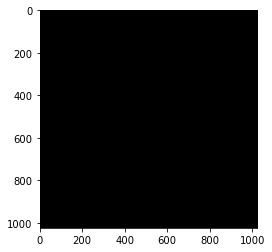

In [6]:
image=np.zeros((total_pixels, total_pixels))

xys_cords=np.asarray(xy_cords_Fs[:,0:2], dtype=np.int32)

#mark center of diffraction
image[int(total_pixels/2), int(total_pixels/2)]=1


for coord in xys_cords:
    x_cord=int(coord[0])
    y_cord=int(coord[1])
    
    image[y_cord, x_cord]=1
    
      
plt.imshow(image, cmap=plt.cm.gray, vmin=image.min(), vmax=image.max())
plt.show()

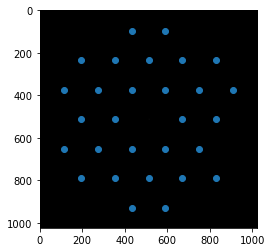

In [7]:
xs=xys_cords[:,0]
ys=xys_cords[:,1]
plt.scatter(xs, ys)
plt.imshow(image, cmap=plt.cm.gray, vmin=image.min(), vmax=image.max())
plt.show()